In [5]:
import numpy as np
import pandas as pd
import os
# Correctly initialize the DataFrame with column names
theta_rej = pd.DataFrame(columns=['Theta', 'Rejection Rate'])
FILE_NAME = 'penalty_3.09_window_40_5hours.txt'
path = os.path.join(os.getcwd(),'results/theta_rej_rate' ,FILE_NAME)
with open(path, 'r') as results:
    lines = results.readlines()
    for line in lines:
        parts = line.split(',')
        if len(parts) == 2:  # Check if the line is correctly formatted
            theta = float(parts[0].split(':')[1].strip())
            rej_rate = float(parts[1].split(':')[1].strip())
            
            # Append the new row to the DataFrame, set ignore_index=True to reindex
            theta_rej.loc[len(theta_rej)] = [theta,rej_rate]
theta_rej.sort_values(by='Theta', inplace=True)
theta_rej

,Theta,Rejection Rate
142,0.0,0.330550
77,0.0,0.324623
130,0.0,0.333390
65,0.0,0.335265
78,0.0,0.337272
...,...,...
14,10.0,0.343237
9,10.0,0.349012
8,10.0,0.337708
46,10.0,0.342328


In [8]:
# Calculating mean rejection rate for each theta
mean_rejection_rates = theta_rej.groupby('Theta')['Rejection Rate'].mean()
mean_rejection_rates

Theta
0.00     0.332220
0.01     0.331557
0.02     0.337435
0.03     0.337761
0.04     0.336890
0.05     0.338355
0.06     0.339067
0.07     0.338427
0.08     0.342347
0.09     0.340741
0.10     0.342373
0.20     0.346600
0.30     0.338533
0.40     0.346221
0.50     0.343718
0.60     0.340544
0.70     0.340071
0.80     0.344400
0.90     0.344926
1.00     0.338635
2.00     0.341563
3.00     0.341355
4.00     0.343089
5.00     0.343832
6.00     0.341465
7.00     0.343138
8.00     0.341574
9.00     0.342434
10.00    0.342248
Name: Rejection Rate, dtype: float64

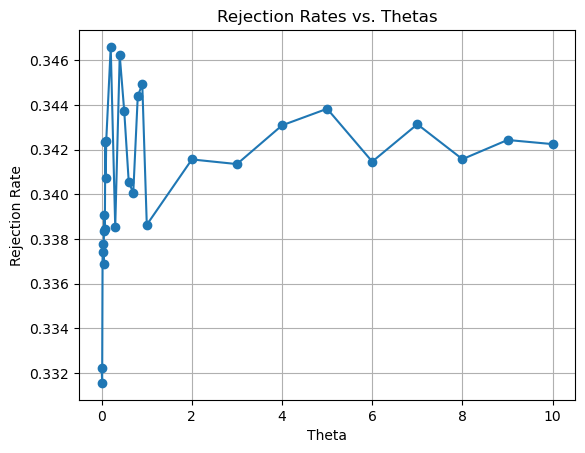

In [9]:
from matplotlib import pyplot as plt
# Plot
theta_list = mean_rejection_rates.index
rej_rate_list = mean_rejection_rates.values
plt.plot(theta_list, rej_rate_list, marker='o')
plt.xlabel('Theta')
plt.ylabel('Rejection Rate')
plt.title('Rejection Rates vs. Thetas')
# plt.xticks(theta_list, rotation=90)
plt.grid(True)
plt.show()